##  K邻近法
1．$k$近邻法是基本且简单的分类与回归方法。$k$近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的$k$个最近邻训练实例点，然后利用这$k$个训练实例点的类的多数来预测输入实例点的类。

2．$k$近邻模型对应于基于训练数据集对特征空间的一个划分。$k$近邻法中，当训练集、距离度量、$k$值及分类决策规则确定后，其结果唯一确定。

3．$k$近邻法三要素：距离度量、$k$值的选择和分类决策规则。常用的距离度量是欧氏距离及更一般的pL距离。$k$值小时，$k$近邻模型更复杂；$k$值大时，$k$近邻模型更简单。$k$值的选择反映了对近似误差与估计误差之间的权衡，通常由交叉验证选择最优的$k$。

常用的分类决策规则是多数表决，对应于经验风险最小化。

4．$k$近邻法的实现需要考虑如何快速搜索k个最近邻点。kd树是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对$k$维空间的一个划分，其每个结点对应于$k$维空间划分中的一个超矩形区域。利用kd树可以省去对大部分数据点的搜索， 从而减少搜索的计算量。

### 距离度量

设特征空间$x$是$n$维实数向量空间 ，$x_{i}, x_{j} \in \mathcal{X}$,$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$,$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}$ ，则：$x_i$,$x_j$的$L_p$距离定义为:

$L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{i=1}^{n}\left|x_{i}^{(i)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$

* $p= 1$ 曼哈顿距离
* $p= 2$ 欧氏距离
* $p= \infty$ 切比雪夫距离

In [1]:
import math
from itertools import combinations

In [2]:
import pandas

In [3]:
def L(x,y,p=2):
    #x1=[1,1] ,x2=[5,1]
    if len(x)==len(y) and len(x)>1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i]-y[i]),p)
        return math.pow(sum,1/p)  #p=2 即先平方和 在 开方
    else:
        return 0

## 课本例3.1

In [6]:
x1=[1,1] 
x2=[5,1]
x3=[4,4]

In [7]:
#x1,x2 计算不同的 p 的最近邻点
for i in range(1,5):#即 k从1 到 4
    #当前的  k  维度
    r = {'1-{}'.format(c):L(x1,c,p=i) for c in [x2,x3]} #分别计算两个点的距离
    print("\nk = "+str(i)+"时，最小距离:",min(zip(r.values(),r.keys())))
   # print(min(zip(r.values(),r.keys())))                #再选出这2个距离里面的最小值


k = 1时，最小距离: (4.0, '1-[5, 1]')

k = 2时，最小距离: (4.0, '1-[5, 1]')

k = 3时，最小距离: (3.7797631496846193, '1-[4, 4]')

k = 4时，最小距离: (3.5676213450081633, '1-[4, 4]')


In [8]:
#format 举例
f = {'1-{}'.format(i):i**2 for i in range(5)}
f

{'1-0': 0, '1-1': 1, '1-2': 4, '1-3': 9, '1-4': 16}

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


from collections import Counter

In [11]:
#data
iris = load_iris()
iris.feature_names #在csv文件的最后面

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.filename

'/home/litao/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [13]:
#创建DataFrame 并指定列名称
df = pd.DataFrame(iris.data, columns = iris.feature_names)
#新增一列
df['label'] = iris.target
#对列 重新命名
df.columns = ['sepal length','sepal width','petal length','petal width','label']
#data = np.array(df.iloc[:100,[0,1,-1]])

In [14]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


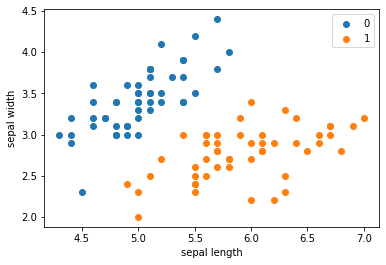

In [15]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

```python
    #查看其他特征
    plt.scatter(df[:50]['petal length'],df[:50]['petal width'],label = '2')
    plt.scatter(df[50:100]['petal length'],df[50:100]['petal width'],label = '3')
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend()
```

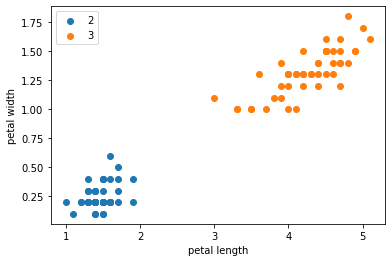

In [16]:
plt.scatter(df[:50]['petal length'],df[:50]['petal width'],label = '2')
plt.scatter(df[50:100]['petal length'],df[50:100]['petal width'],label = '3')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [17]:
#选取数据 book:data_analysis_python   p144
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
#注意顺序
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
X_train[0:10]

array([[6. , 3.4],
       [4.8, 3. ],
       [5.7, 2.9],
       [6.7, 3.1],
       [5.6, 2.7],
       [5. , 3.5],
       [4.7, 3.2],
       [7. , 3.2],
       [5.1, 3.4],
       [6.1, 2.8]])

In [21]:
#举例
a = ([8,77,6,5,4])
print(type(a))
#返回下标
a.index(max(a,key=lambda x:x))

<class 'list'>


1

In [23]:
max([1,2,3])

3

In [32]:
s = ([(10,2,1),(8,9,9),(4,5,18)])
#传入命名参数key，其为一个函数，用来指定取最大值的方法
#求最大值方式按照中括号[]里面的维度，[0]按照第一维，[1]按照第二维
n1 = s.index(max(s,key=lambda x:x[2]))
n2 = s.index(max(s,key=lambda x:x[1]))
n3 = s.index(max(s,key=lambda x:x[0]))
print(n1,n2,n3)

2 1 0


In [33]:
##传入命名参数key，其为一个函数，用来指定取最大值的方法
idx = max(s,key=lambda x:x[2])
print(idx)
s.index(idx)

(4, 5, 18)


2

In [34]:
len(X_train)

80

In [35]:
#knn_list = [(dist,label)]
s = [(10,1),(8,1),(4,0),(7,1),(2,0)]
knn = [k[-1] for k in s]
#即返回的是标签
knn

[1, 1, 0, 1, 0]

In [36]:
type(s)

list

In [37]:
knncount = Counter(knn)
knncount

Counter({1: 3, 0: 2})

In [81]:
max_count = sorted(knncount.items(),key = lambda x:x[1])#[-1][0]
max_count

[(0, 2), (1, 3)]

In [38]:
#找到样本点周围的K个点，其中占数目最多的类即预测输出的类：实际上这就是K近邻所使用的算法
#直接遍历预测点与所有点的距离，并找到最近的K个点即可
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors临近点个数 k
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        #取出 前 n 个点
        knn_list = []
        for i in range(self.n):
            #求范数 l2
            dist = np.linalg.norm(X - self.X_train[i],ord = self.p)#计算距离
            # append的是（value1,value2）
            knn_list.append((dist, self.y_train[i]))
        #剩余的 len(X_train)-n 个点，即后面的剩余的点
        for i in range(self.n,len(self.X_train)):
            #求最大值方式按照中括号[]里面的维度，[0]按照第一维，[1]按照第二维。
            #故下面这行代码是按照dist来查找（value1,value2）
            #求出最大值的下标
            max_index = knn_list.index(max(knn_list,key = lambda x:x[0]))
            #距离替换，将距离远的替换掉直到剩下最近的 n=k个点
            dist = np.linalg.norm(X - self.X_train[i],ord = self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist,self.y_train[i])
        #统计  统计标签
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        #max_count = sorted(count_paris,key = lambda x:x)[-1]
        #返回数量占多数的标签
        #（label，counts）按照count是排序找到max                       #再取出label
        max_count = sorted(count_pairs.items(),key = lambda x:x[1])[-1][0]
        return max_count
    def score(self,X_test,y_test):
        right_count = 0
        n = 10
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label ==y:
                right_count+=1
            return right_count / len(X_test)

In [39]:
clf = KNN(X_train,y_train)

In [40]:
clf.score(X_test,y_test)

0.05

In [41]:
test_point = [6.0,3.0]
print('Test Ponit: {}'.format(clf.predict(test_point)))

Test Ponit: 1.0


In [42]:
type(test_point)

list

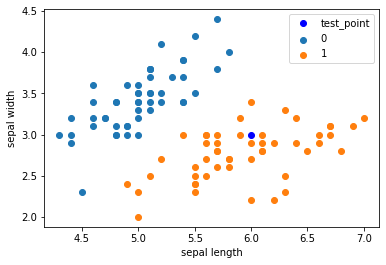

In [43]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## scikit-learn实例


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
clf_sk.score(X_test, y_test)

1.0

## sklearn.neighbors.KNeighborsClassifier
* n_neighbors: 临近点个数
* p: 距离度量
* algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
* weights: 确定近邻的权重

## kd树

kd树是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。

kd树是二叉树，表示对$k$维空间的一个划分（partition）。构造kd树相当于不断地用垂直于坐标轴的超平面将$k$维空间切分，构成一系列的k维超矩形区域。kd树的每个结点对应于一个$k$维超矩形区域。

构造kd树的方法如下：

构造根结点，使根结点对应于$k$维空间中包含所有实例点的超矩形区域；通过下面的递归方法，不断地对$k$维空间进行切分，生成子结点。在超矩形区域（结点）上选择一个坐标轴和在此坐标轴上的一个切分点，确定一个超平面，这个超平面通过选定的切分点并垂直于选定的坐标轴，将当前超矩形区域切分为左右两个子区域 （子结点）；这时，实例被分到两个子区域。这个过程直到子区域内没有实例时终止（终止时的结点为叶结点）。在此过程中，将实例保存在相应的结点上。

通常，依次选择坐标轴对空间切分，选择训练实例点在选定坐标轴上的中位数 （median）为切分点，这样得到的kd树是平衡的。注意，平衡的kd树搜索时的效率未必是最优的。


## 构造平衡kd树算法
输入：$k$维空间数据集$T＝\{x_1，x_2,…,x_N\}$，

其中$x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(k)}\right)^{\mathrm{T}}$ ，$i＝1,2,…,N$；

输出：kd树。

（1）开始：构造根结点，根结点对应于包含$T$的$k$维空间的超矩形区域。

选择$x^{(1)}$为坐标轴，以T中所有实例的$x^{(1)}$坐标的中位数为切分点，将根结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由根结点生成深度为1的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域， 右子结点对应于坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在根结点。

（2）重复：对深度为$j$的结点，选择$x^{(1)}$为切分的坐标轴，$l＝j(modk)+1$，以该结点的区域中所有实例的$x^{(1)}$坐标的中位数为切分点，将该结点对应的超矩形区域切分为两个子区域。切分由通过切分点并与坐标轴$x^{(1)}$垂直的超平面实现。

由该结点生成深度为$j+1$的左、右子结点：左子结点对应坐标$x^{(1)}$小于切分点的子区域，右子结点对应坐标$x^{(1)}$大于切分点的子区域。

将落在切分超平面上的实例点保存在该结点。

（3）直到两个子区域没有实例存在时停止。从而形成kd树的区域划分。

![jupyter](./0.png)

In [47]:
# kd-tree每个结点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量  节点     (k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该结点分割超平面左子空间构成的kd-tree
        self.right = right  # 该结点分割超平面右子空间构成的kd-tree


class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(split, data_set):  # 按第split维划分数据集exset创建KdNode
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # //为Python中的整数除法
            median = data_set[split_pos]  # 中位数分割点
            #p54----l = j(mod k)+1 即求第l个特征（维度），
            split_next = (split + 1) % k  # cycle coordinates

            # 递归的创建kd树
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树

        self.root = CreateNode(0, data)  # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  # 节点不为空
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [48]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")


def find_nearest(tree, point):
    k = len(point)  # 数据维度

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  # python中用float("inf")和float("-inf")表示正负无穷

        nodes_visited = 1

        s = kd_node.split  # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”

        if target[s] <= pivot[s]:  # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node = kd_node.left  # 下一个访问节点为左子树根节点
            further_node = kd_node.right  # 同时记录下右子树
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域

        nearest = temp1.nearest_point  # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  # 更新最近距离

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist  # 最近点将在以目标点为球心，max_dist为半径的超球体内

        temp_dist = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_dist < temp_dist:  # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited)  # 不相交则可以直接返回，不用继续判断

        #----------------------------------------------------------------------
        # 计算目标点与分割点的欧氏距离
        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist:  # 如果“更近”
            nearest = pivot  # 更新最近点
            dist = temp_dist  # 更新最近距离
            max_dist = dist  # 更新超球体半径

        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point  # 更新最近点
            dist = temp2.nearest_dist  # 更新最近距离

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

 ## 例3.2


In [49]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [50]:

from time import clock
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]
 
# 产生n个k维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [51]:
random_point(3)

[0.8917772373853852, 0.7213662984485525, 0.0957665284076279]

In [52]:
random_points(3,5)

[[0.3551855156219027, 0.8857352390202383, 0.9702500126268171],
 [0.6326694046766774, 0.2690318309623484, 0.40071933602265697],
 [0.3236017914004694, 0.001175414684301379, 0.7542401147218648],
 [0.5577953681298805, 0.6187061752630558, 0.19529616783310744],
 [0.9806714173222467, 0.3426750173796823, 0.4200804537845796]]

In [53]:
ret = find_nearest(kd, [3,4.5])
print (ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [54]:
N = 400000
t0 = clock()
kd2 = KdTree(random_points(3, N))            # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1,0.5,0.8])      # 四十万个样本点中寻找离目标最近的点
t1 = clock()
print ("time: ",t1-t0, "s")
print (ret2)

/home/litao/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


time:  2.9450150000000006 s
Result_tuple(nearest_point=[0.08837549707046488, 0.4973200881130203, 0.7984501483114314], nearest_dist=0.0120296731600366, nodes_visited=87)


/home/litao/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
